# Una rápida introducción al _Machine Learning_  Parte 2



## Unsupervised Learning

Consideremos que tenemos un dataset **SIN** etiquetas (y), y queremos saber si podemos deducir una clasificación o no. 
Pues tenemos dos maneras de hacerlo:

1. Leernos el fichero a mano, y etiquetarlo para poder enseñar a algún modelo
2. Utilizamos una tecnica que nos permita ver relaciones automáticamente.

Pues bueno, como la opción 1 ya la hemos hecho, hagamos la 2ª


### K-Means






In [86]:
%pylab inline
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import sklearn.metrics as sm

import pandas as pd
import numpy as np


# Load the diabetes dataset
data=pd.read_csv("../data/datasets/diabetes.tsv",delimiter="\t" )
#Acordarse de normalizar los datos!!
data_norm =data # (data-data.mean())/(data.std())

x = data_norm.ix[:, 0:9]
y = np.where(data["Y"]>200, 1, 0)
# K Means Cluster
model = KMeans(init="k-means++",max_iter=1000,n_clusters=2)
model.fit(x)


Populating the interactive namespace from numpy and matplotlib


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [87]:
# vamos a ver que ha sacado el kmeans
model.labels_

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0,

Bueno, pandas no solo nos ofrece la carga de los ficheros (Que por cierto se puede hacer en batch para ficheros enormes)
si no que nos ofrece la capacidad de obtener información muy valiosa:


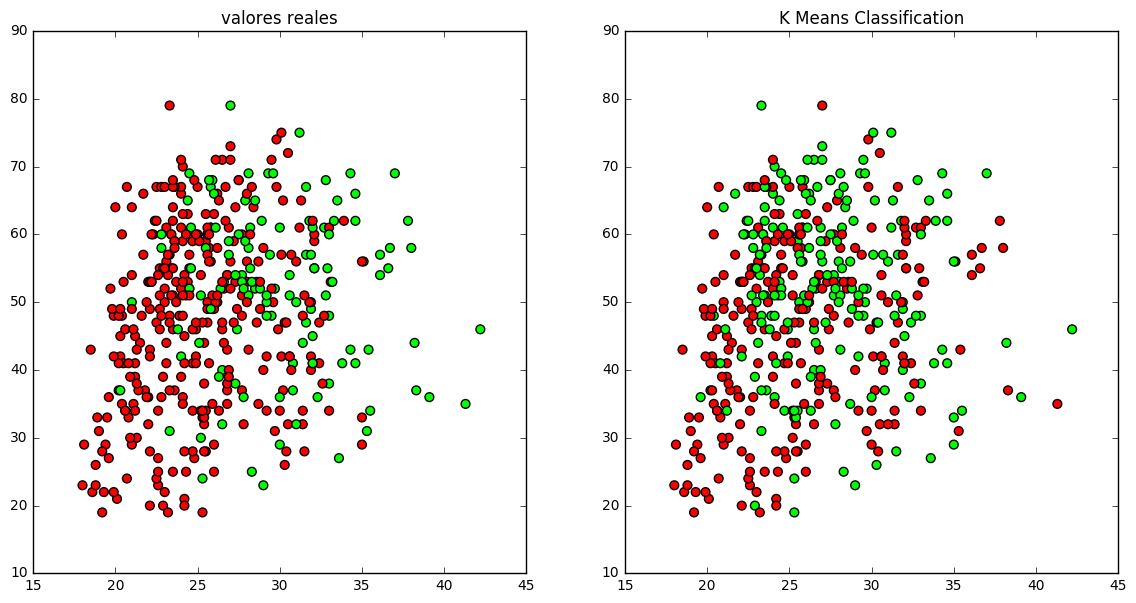

In [88]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))

# Create a colormap
colormap = np.array(['red', 'lime'])

# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x.BMI, x.AGE, c=colormap[y], s=40)
plt.title('valores reales')

# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.BMI, x.AGE, c=colormap[model.labels_], s=40)
plt.title('K Means Classification')

In [89]:
# Bueno, sabemos que los colores están cambiados,ya que nosotros si que somos capaces de darle un contexto a los números
predY = np.choose(model.labels_, [0,1]).astype(np.int64)
print (model.labels_[:10])
print (predY[:10])

[0 0 0 1 1 0 0 1 0 0]
[0 0 0 1 1 0 0 1 0 0]


In [90]:
sm.accuracy_score(y, predY)

0.60633484162895923

In [91]:
# Vamos a ver la "Confusion Matrix"
sm.confusion_matrix(y, predY)

array([[201, 120],
       [ 54,  67]])

In [92]:
model.predict([.5,.5,.5,.5,.5,.5,.5,.5,.5])

/usr/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0], dtype=int32)

In [94]:
#ahora vais ha hacerlo vosotros, con el dataset típico de Iris
from sklearn import datasets
iris = datasets.load_iris()
# Os dejo ya preparadito el dataset
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']


In [179]:
#Bueno a la faena


#entrenalo



In [180]:
#que precisión has cosneguido ?

In [181]:
# Muestra la "Confusion Matrix"



Bueno ahora ya hemos visto el metodo clásico de clustering 

Vamos a avanzar un poco más

## PCA o Principal Components Analisys

Esta técnica es muy usada para dos cosas:
1. reducción de dimensiones
2. Detectar relaciones entre las features




In [154]:
import numpy as np
from sklearn.decomposition import PCA

# Load the diabetes dataset
data=pd.read_csv("../data/datasets/diabetes.tsv",delimiter="\t" )
#ale vamos a normalizar todos los datos ;)
data_norm = (data-data.mean())/(data.std())
#Ahora cogemos todas las features que tenemos
diabetes_X = data_norm.ix[:, 0:9].values
diabetes_Y = np.where(data["Y"]>200, 1, 0)


pca = PCA(n_components=2,whiten=True)
pca.fit(diabetes_X)
X = pca.transform(diabetes_X)

print(pca.explained_variance_ratio_) 
print(pca.get_covariance()[0])

[ 0.40838911  0.16511182]
[ 1.10248967  0.45996083  0.77053718  0.67690817  0.97345079  0.99894795
 -0.71299992  1.14475261  0.98479916]


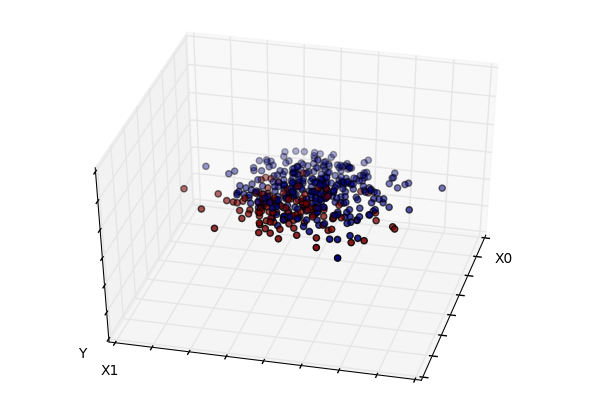

In [177]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=40, azim=14)

# Reorder the labels to have colors matching the cluster results
y = np.choose(diabetes_Y, [ 0,1]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], c=y )

ax.w_xaxis.set_ticklabels(["X0"])
ax.w_yaxis.set_ticklabels(["X1"])
ax.w_zaxis.set_ticklabels(["Y"])

plt.show()

Bueno, pues parece que si hay algún tipo de relación ;)

Vamos a probar otra vez el SGDClassifier con estos datos modificados a ver que tal se da...

In [178]:
from sklearn import  linear_model
from sklearn.cross_validation import train_test_split
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from sklearn.model_selection import cross_val_score


diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(X,
                                                                                   y,test_size=.2)
n_iter = np.ceil(10**6 / len(X)/2)

clf = SGDClassifier(loss="hinge", penalty="l2",n_iter=n_iter)
clf.fit(diabetes_X_train, diabetes_y_train)

print( clf.coef_)
print("error cuadrático: %.2f"
      % np.mean((clf.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' 
      % clf.score(diabetes_X_test, diabetes_y_test))

clf.predict(diabetes_X_test)

scores=cross_val_score(clf, diabetes_X_train, diabetes_y_train, cv=3, n_jobs=1)
print(scores.mean())

[[ 0.96916456 -0.40526516]]
error cuadrático: 0.21
Variance score: 0.79
0.764908976773


In [162]:
#ahora hacer vosotros lo mismo, pero con distinta cantidad de componentes a ver hastsa donde podemos subir la precisión



### Bueno, aquí acabamos la segunda  parte. 
### Ahora seguiremos con el tercer Notebook